In [1]:
import os
Dir_path ="C:/Users/Rohit/Thesis"
os.chdir(Dir_path)

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
# I have used the cmd prompt to set the Directory and download the Zip file using Kaggle API,
# The Screenshot is given in the configuration Manual report

# Below is alternative Method to download the ZIP File

# Set environment variables for using the Kaggle API.
#os.environ["KAGGLE_USERNAME"] = "Kaggle_username"
#os.environ["KAGGLE_KEY"] = "Kaggle Account_Key

In [4]:
# Below is the API key we can use to Download the Data using jupyter

#!kaggle competitions download -c rsna-intracranial-hemorrhage-detection

In [5]:
######### importing Library to read the files

import pandas as pd
import numpy as np

In [6]:
###### Full Data is around 460GB, So i have used an external hardDisk to store and fatch the data

Data_PATH = 'D:/rsna-intracranial-hemorrhage-detection/'

TRAIN_Image = 'stage_2_train/'
TEST_Image = 'stage_2_test/'
train_CSV = pd.read_csv(Data_PATH + 'stage_2_train.csv')
subm_CSV = pd.read_csv(Data_PATH + 'stage_2_sample_submission.csv')

In [7]:
train_CSV['filename'] = train_CSV['ID'].apply(lambda st: "ID_" + st.split('_')[1] + ".png")
train_CSV['type'] = train_CSV['ID'].apply(lambda st: st.split('_')[2])
subm_CSV['filename'] = subm_CSV['ID'].apply(lambda st: "ID_" + st.split('_')[1] + ".png")
subm_CSV['type'] = subm_CSV['ID'].apply(lambda st: st.split('_')[2])

print(train_CSV.shape)
train_CSV.head()

(4516842, 4)


,ID,Label,filename,type
0,ID_12cadc6af_epidural,0,ID_12cadc6af.png,epidural
1,ID_12cadc6af_intraparenchymal,0,ID_12cadc6af.png,intraparenchymal
2,ID_12cadc6af_intraventricular,0,ID_12cadc6af.png,intraventricular
3,ID_12cadc6af_subarachnoid,0,ID_12cadc6af.png,subarachnoid
4,ID_12cadc6af_subdural,0,ID_12cadc6af.png,subdural


In [8]:
test_df = pd.DataFrame(subm_CSV.filename.unique(), columns=['filename'])
print(test_df.shape)
test_df.head()

(121232, 1)


,filename
0,ID_0fbf6a978.png
1,ID_d62ec3412.png
2,ID_cb544194b.png
3,ID_0d62513ec.png
4,ID_fc45b2151.png


In [9]:
# Hemorrhage Subtypes
hemtypes = train_CSV.groupby('type').sum()
hemtypes

,Label
type,
any,107933
epidural,3145
intraparenchymal,36118
intraventricular,26205
subarachnoid,35675
subdural,47166


<AxesSubplot:xlabel='Label', ylabel='type'>

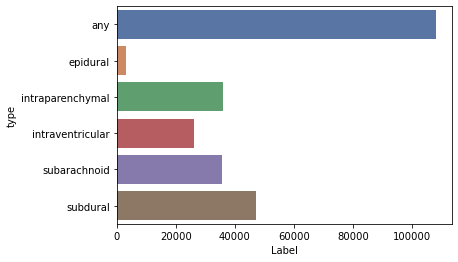

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=hemtypes.index, x=hemtypes.Label, palette="deep")

In [11]:
# 50000 random file sample is taken from the stage_2_train file
import os
np.random.seed(2019)
files = np.random.choice(os.listdir(Data_PATH + TRAIN_Image), 50000) 
file_df = train_CSV[train_CSV.filename.apply(lambda x: x.replace('.png', '.dcm')).isin(files)]

In [12]:
#Checking the duplicates and dropping them.

Data_df = file_df[['Label', 'filename', 'type']].drop_duplicates().pivot(
    index='filename', columns='type', values='Label').reset_index()
print(Data_df.shape)
Data_df

(47882, 7)


type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_0002108bd.png,0,0,0,0,0,0
1,ID_000229f2a.png,0,0,0,0,0,0
2,ID_0002e8344.png,0,0,0,0,0,0
3,ID_0004cd66f.png,0,0,0,0,0,0
4,ID_0004d2ded.png,0,0,0,0,0,0
...,...,...,...,...,...,...,...
47877,ID_c9c635ce2.png,0,0,0,0,0,0
47878,ID_c9c74d0da.png,1,0,0,0,0,1
47879,ID_c9c7f62aa.png,1,0,0,1,0,0
47880,ID_c9c84f60d.png,0,0,0,0,0,0


In [13]:
#Checking the duplicates and dropping in test set.

test_df = subm_CSV[['Label', 'filename', 'type']].drop_duplicates().pivot(
    index='filename', columns='type', values='Label').reset_index()
print(test_df.shape)
test_df

(121232, 7)


type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000000e27.png,0.5,0.5,0.5,0.5,0.5,0.5
1,ID_000009146.png,0.5,0.5,0.5,0.5,0.5,0.5
2,ID_00007b8cb.png,0.5,0.5,0.5,0.5,0.5,0.5
3,ID_000134952.png,0.5,0.5,0.5,0.5,0.5,0.5
4,ID_000176f2a.png,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
121227,ID_fffb40805.png,0.5,0.5,0.5,0.5,0.5,0.5
121228,ID_fffc74999.png,0.5,0.5,0.5,0.5,0.5,0.5
121229,ID_fffd3cc3b.png,0.5,0.5,0.5,0.5,0.5,0.5
121230,ID_fffdcca96.png,0.5,0.5,0.5,0.5,0.5,0.5


In [14]:
# 5000 random file sample is taken from the stage_2_train

np.random.seed(2019)
s_test = np.random.choice(os.listdir(Data_PATH + TEST_Image), 5000) 
sample_test = test_df[test_df.filename.apply(lambda x: x.replace('.png', '.dcm')).isin(s_test)]

In [15]:
validate_dataf = Data_df.sample(int(len(Data_df) * 0.15))  
validate_dataf 

type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
8194,ID_2642b53a0.png,0,0,0,0,0,0
21244,ID_5a31cda45.png,0,0,0,0,0,0
13085,ID_39f58df73.png,0,0,0,0,0,0
17599,ID_4be83ba65.png,0,0,0,0,0,0
33734,ID_8ba70b06f.png,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19099,ID_51d94f772.png,1,0,0,0,0,1
15845,ID_45113f0a7.png,0,0,0,0,0,0
27487,ID_727534bde.png,0,0,0,0,0,0
16193,ID_467d80462.png,0,0,0,0,0,0


In [16]:
y_true = []
for i in range(len(validate_dataf)): 
    y_true.append(validate_dataf.iloc[i,1])
len(y_true)

7182

In [17]:
training_dataf = Data_df[~(Data_df.filename.isin(validate_dataf.filename))]
training_dataf

# validation file matching image name remove from the main training file and remaning data is below

type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
1,ID_000229f2a.png,0,0,0,0,0,0
2,ID_0002e8344.png,0,0,0,0,0,0
3,ID_0004cd66f.png,0,0,0,0,0,0
4,ID_0004d2ded.png,0,0,0,0,0,0
5,ID_0007a286e.png,0,0,0,0,0,0
...,...,...,...,...,...,...,...
47876,ID_c9c5b1662.png,0,0,0,0,0,0
47878,ID_c9c74d0da.png,1,0,0,0,0,1
47879,ID_c9c7f62aa.png,1,0,0,1,0,0
47880,ID_c9c84f60d.png,0,0,0,0,0,0


In [18]:
# Importing Library for windowing and conversion

import json
import cv2
import pydicom
from tqdm import tqdm

In [19]:
#### Getting pixels of the images,

def get_pixels_hu(scan): 
    image = np.stack([scan.pixel_array])
    image = image.astype(np.int16) 
    
    image[image == -2000] = 0
    
    intercept = scan.RescaleIntercept
    slope = scan.RescaleSlope
    
    if slope != 1: 
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
    
    image += np.int16(intercept) 
    
    return np.array(image, dtype=np.int16)

In [20]:
#### 3 channel windowing of the image

def apply_window(image, center, width):
    image = image.copy()
    min_value = center - width // 2
    max_value = center + width // 2
    image[image < min_value] = min_value
    image[image > max_value] = max_value
    return image


def apply_window_policy(image):

    image1 = apply_window(image, 40, 80) # brain
    image2 = apply_window(image, 80, 200) # subdural
    image3 = apply_window(image, 40, 380) # bone
    image1 = (image1 - 0) / 80
    image2 = (image2 - (-20)) / 200
    image3 = (image3 - (-150)) / 380
    image = np.array([
        image1 - image1.mean(),
        image2 - image2.mean(),
        image3 - image3.mean(),
    ]).transpose(1,2,0)

    return image

In [21]:
####### Resizing and saving the 128*128 dimensions image to the listed directory.

def resize_save(filenames, load_dir):    
    save_dir = 'C:/Users/yufen/Desktop/Resize_PNG_Data/'
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for filename in tqdm(filenames):
        try:
            path = load_dir + filename
            new_path = save_dir + filename.replace('.dcm', '.png')
            dcm = pydicom.dcmread(path)
            image = get_pixels_hu(dcm)
            image = apply_window_policy(image[0])
            image -= image.min((0,1))
            image = (255*image).astype(np.uint8)  # Normalize the Image
            image = cv2.resize(image, (128, 128)) # Resize image pixel
            res = cv2.imwrite(new_path, image)
            
        except ValueError:
            continue # black image,

In [22]:
#####Resize and conversion of the dcm image to png is done and saved in the computer folder, I have atteched the png image screenshot in configuration manul
###### so for data generator we can 

resize_save(filenames=files, load_dir=Data_PATH + TRAIN_Image)
resize_save(filenames=s_test, load_dir=Data_PATH + TEST_Image)

100%|██████████| 5000/5000 [05:45<00:00, 14.49it/s]


In [23]:
##Importing the required libraries for CNN + Transfer Learning MOdel

import json
import matplotlib.pyplot as plt
import pydicom
import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.initializers import Constant
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.python.ops import array_ops
from tqdm import tqdm
from keras import backend as K
from keras.models import Model, load_model
from math import ceil, floor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import log_loss
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from PIL import Image
from keras import models
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras import optimizers
from keras import regularizers



In [24]:
######## Image Data Generator is applied for the augmentation of the converted png Image,

def Datagen_creater():
    return ImageDataGenerator()


def training_gen(datagen):
    return datagen.flow_from_dataframe(
        training_dataf, 
        directory="C:/Users/yufen/Desktop/Resize_PNG_Data/",
        x_col='filename', 
        y_col=['any', 'epidural', 'intraparenchymal', 
               'intraventricular', 'subarachnoid', 'subdural'],
        class_mode='raw',
        target_size=(128, 128),
        batch_size=32,   
    )

def testing_gen():
    return ImageDataGenerator().flow_from_dataframe(
        sample_test,
        directory= "C:/Users/yufen/Desktop/Resize_PNG_Data/",
        x_col='filename',
        class_mode=None,
        target_size=(128, 128),
        batch_size=32, 
        shuffle=False
    )

def validating_gen(datagen): 
    return datagen.flow_from_dataframe(
        validate_dataf, 
        directory="C:/Users/yufen/Desktop/Resize_PNG_Data/", 
        x_col='filename', 
        y_col=['any', 'epidural', 'intraparenchymal', 
               'intraventricular', 'subarachnoid', 'subdural'],
        class_mode='raw',
        target_size=(128, 128),
        batch_size=32,
        shuffle=False,     
    )

# Using original generator
data_generator = Datagen_creater()
training_gen = training_gen(data_generator)
validating_gen = validating_gen(data_generator)
testing_gen = testing_gen()


Found 40700 validated image filenames.
Found 7182 validated image filenames.
Found 4911 validated image filenames.


In [26]:
### below is the function used to Reduce learning rate when a metric has stopped improving.
### early stop 

from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

checkpoint = ModelCheckpoint(
    'Full_model.h5',           #full model checkoint is set because during training the model kernals turn to dead
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto')


#### during the model traning and validation it keep stoping the epochs before the final step so i have removed early stop from code

#Early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1,
 #                                             mode='auto', baseline=None, restore_best_weights=False)

In [27]:
#initializing CNN

cnn_model = models.Sequential()

#model architecture defining
cnn_model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D((2, 2)))

#fully connected layer
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

#one layer activated by sigmoid
cnn_model.add(Dense(6, activation = 'sigmoid'))

In [28]:
#compiling
cnn_model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])

In [29]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1843264   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8

In [30]:
# setting the time to check the time taken by model
BATCH_SIZE = 32
import datetime
start = datetime.datetime.now()

### Setting steps per epochs for final model
total_steps = files.shape[0] // BATCH_SIZE
total_steps = total_steps // 4

#fitting the model
cnn_history = cnn_model.fit(training_gen,
                            steps_per_epoch = total_steps,
                            epochs = 10,
                            validation_data = validating_gen,
                            validation_steps=total_steps * 0.15,
                            callbacks = [learning_rate_reduction, checkpoint])

Epoch 1/10
390/390 [==============================] - 161s 412ms/step - loss: 0.4384 - acc: 0.5265 - val_loss: 0.2301 - val_acc: 0.5344
Epoch 2/10
390/390 [==============================] - 137s 352ms/step - loss: 0.1898 - acc: 0.6189 - val_loss: 0.1887 - val_acc: 0.5832
Epoch 3/10
390/390 [==============================] - 130s 333ms/step - loss: 0.1742 - acc: 0.6875 - val_loss: 0.1756 - val_acc: 0.7876
Epoch 4/10
390/390 [==============================] - 133s 341ms/step - loss: 0.1660 - acc: 0.7877 - val_loss: 0.1736 - val_acc: 0.8125
Epoch 5/10
390/390 [==============================] - 132s 340ms/step - loss: 0.1630 - acc: 0.8382 - val_loss: 0.1706 - val_acc: 0.8337
Epoch 6/10
390/390 [==============================] - 134s 344ms/step - loss: 0.1555 - acc: 0.8278 - val_loss: 0.1735 - val_acc: 0.7834
Epoch 7/10
390/390 [==============================] - 131s 335ms/step - loss: 0.1539 - acc: 0.8134 - val_loss: 0.1693 - val_acc: 0.7749
Epoch 8/10
390/390 [============================

In [31]:
#total time taken
end = datetime.datetime.now()
elapsed = end - start
print('To complete the Training it took a total of {}'.format(elapsed))

To complete the Training it took a total of 0:22:45.637432


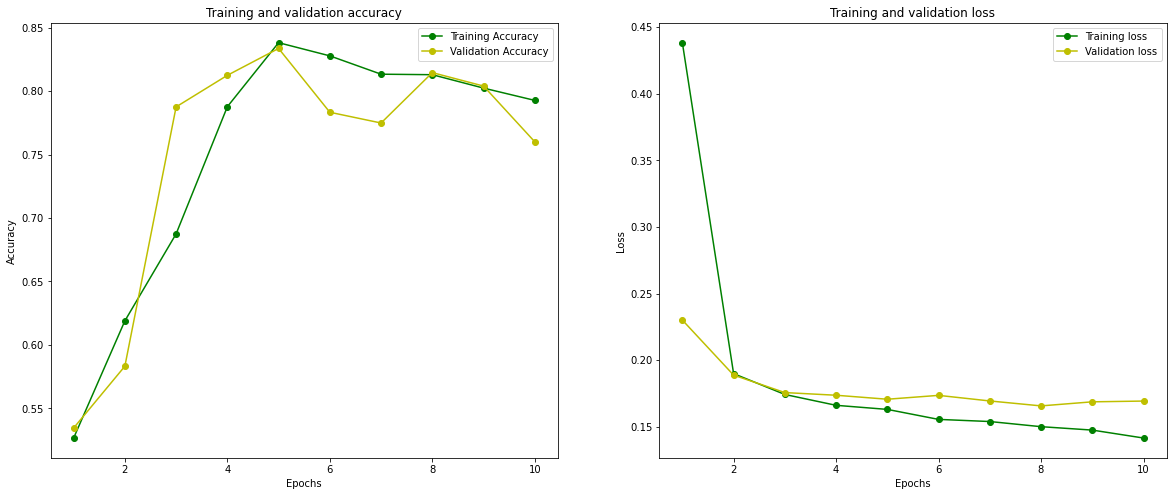

In [32]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

acc = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

ax[0].plot(epochs, acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'yo-', label='Validation Accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'go-', label='Training loss')
ax[1].plot(epochs, val_loss, 'yo-', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [33]:
validating_preds = cnn_model.predict(validating_gen, verbose = 1)

225/225 [==============================] - 37s 163ms/step


In [34]:
y_prediction = []
for i in range(len(validating_preds)):
    y_prediction.append(0)
    for value in validating_preds[i]: 
        if value > 0.5: 
            y_prediction[i] = 1
            break
            
        
len(y_prediction)

7182

In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_true, y_prediction))
cm = confusion_matrix(y_true, y_prediction)

[[5860  269]
 [ 714  339]]


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [37]:
import itertools   
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2) 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

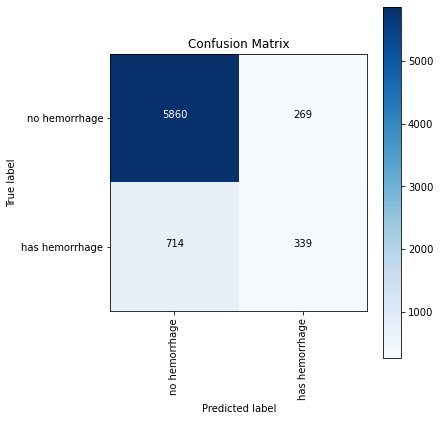

In [38]:
plot_confusion_matrix(cm, classes= ['no hemorrhage', 'has hemorrhage'], title='Confusion Matrix', normalize = False)

In [39]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [40]:
print('Model: CNN', '\n', classification_report(y_true, y_prediction, target_names = ['No Hemorrhage', 'Has Hemmorrhage']))

Model: CNN 
                  precision    recall  f1-score   support

  No Hemorrhage       0.89      0.96      0.92      6129
Has Hemmorrhage       0.56      0.32      0.41      1053

       accuracy                           0.86      7182
      macro avg       0.72      0.64      0.67      7182
   weighted avg       0.84      0.86      0.85      7182



In [60]:
######## Second Transfer Learning Model ------DenseNet121---------------------


from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(128, 128, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [64]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 427 layers


In [65]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape Tensor("input_3:0", shape=(None, None, None, 3), dtype=float32)
The output shape Tensor("relu/Relu_1:0", shape=(None, None, None, 1024), dtype=float32)


In [66]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(6, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [67]:
# setting the time to check the time taken by model
BATCH_SIZE = 32
import datetime
start = datetime.datetime.now()

total_steps = files.shape[0] // BATCH_SIZE
total_steps = total_steps // 4

DenseNet121 = model.fit(training_gen,
                steps_per_epoch = total_steps,
                epochs = 10,
                validation_data = validating_gen,
                validation_steps=total_steps * 0.15,
                callbacks = [learning_rate_reduction])


Epoch 1/10
390/390 [==============================] - 2567s 7s/step - loss: 0.1592 - accuracy: 0.8478 - val_loss: 0.1485 - val_accuracy: 0.8718
Epoch 2/10
390/390 [==============================] - 2547s 7s/step - loss: 0.1372 - accuracy: 0.9308 - val_loss: 0.2446 - val_accuracy: 0.9788
Epoch 3/10
390/390 [==============================] - 2560s 7s/step - loss: 0.1299 - accuracy: 0.9199 - val_loss: 0.1913 - val_accuracy: 0.9248
Epoch 4/10
390/390 [==============================] - 2570s 7s/step - loss: 0.1286 - accuracy: 0.8882 - val_loss: 0.2241 - val_accuracy: 0.8988
Epoch 5/10
390/390 [==============================] - 2486s 6s/step - loss: 0.1213 - accuracy: 0.9276 - val_loss: 0.1431 - val_accuracy: 0.8294
Epoch 6/10
390/390 [==============================] - 2477s 6s/step - loss: 0.1161 - accuracy: 0.9129 - val_loss: 0.1356 - val_accuracy: 0.9417
Epoch 7/10
390/390 [==============================] - 2654s 7s/step - loss: 0.1203 - accuracy: 0.9210 - val_loss: 0.1851 - val_accuracy:

In [68]:
#total time taken
end = datetime.datetime.now()
elapsed = end - start
print('To complete the Training it took a total of {}'.format(elapsed))

To complete the Training it took a total of 7:23:10.810033


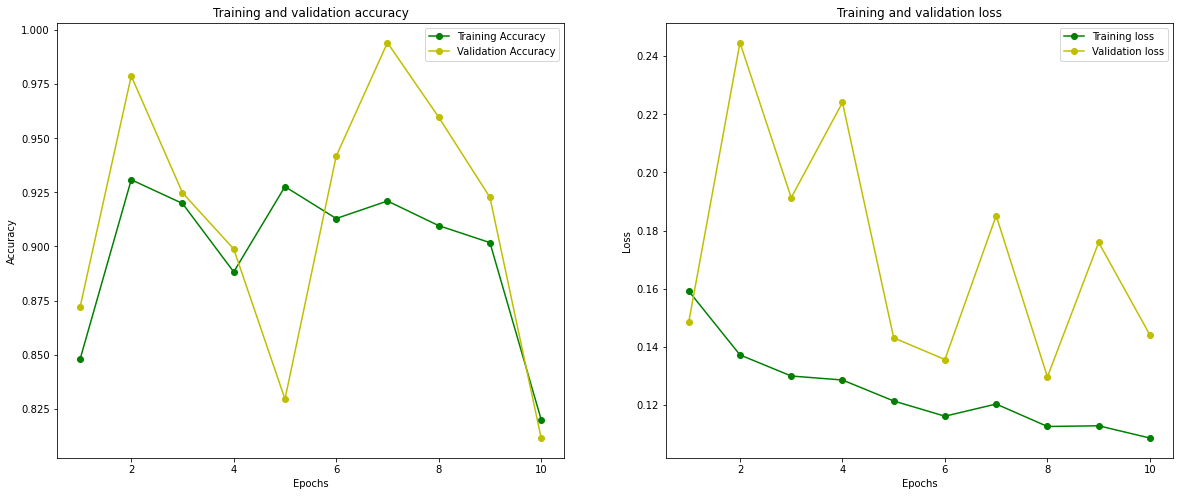

In [69]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

acc = DenseNet121.history['accuracy']
val_acc = DenseNet121.history['val_accuracy']
loss = DenseNet121.history['loss']
val_loss = DenseNet121.history['val_loss']
epochs = range(1, len(acc) + 1)

ax[0].plot(epochs, acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'yo-', label='Validation Accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'go-', label='Training loss')
ax[1].plot(epochs, val_loss, 'yo-', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [70]:
Dense_val_preds = model.predict(validating_gen, verbose = 1)

225/225 [==============================] - 195s 867ms/step


In [71]:
Dense_val_preds

array([[1.08993948e-02, 4.15988688e-05, 5.47167659e-03, 7.20921598e-05,
        9.49835777e-03, 6.32247329e-03],
       [2.16415524e-03, 8.07512879e-06, 8.64535570e-04, 8.92782282e-06,
        1.63656473e-03, 3.68565321e-04],
       [4.53719020e-01, 5.26639819e-03, 1.97664857e-01, 1.46233231e-01,
        2.14304864e-01, 7.68774450e-02],
       ...,
       [4.29983079e-01, 6.65605068e-04, 8.50119591e-02, 1.79360688e-01,
        2.71442086e-01, 1.27623975e-02],
       [6.53818250e-03, 3.83118531e-05, 6.49416447e-03, 1.05705476e-04,
        3.26776505e-03, 4.05707955e-03],
       [1.10220045e-01, 1.75487995e-03, 3.46860290e-02, 5.88870049e-03,
        4.84040678e-02, 4.88123894e-02]], dtype=float32)

In [72]:
Dense_y_preds = []
for i in range(len(Dense_val_preds)):
    Dense_y_preds.append(0)
    for value in Dense_val_preds[i]: 
        if value > 0.5: 
            Dense_y_preds[i] = 1
            break
            
        
len(Dense_y_preds)

7182

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, Dense_y_preds))
cm = confusion_matrix(y_true, Dense_y_preds)

[[5747  382]
 [ 325  728]]


In [74]:
import itertools   
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2) 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

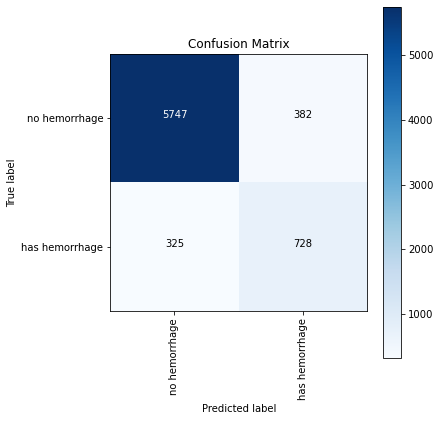

In [75]:
plot_confusion_matrix(cm, classes= ['no hemorrhage', 'has hemorrhage'], title='Confusion Matrix', normalize = False)

In [76]:
print('Model: DenseNet', '\n', classification_report(y_true, Dense_y_preds, target_names = ['No Hemorrhage', 'Has Hemmorrhage']))

Model: DenseNet 
                  precision    recall  f1-score   support

  No Hemorrhage       0.95      0.94      0.94      6129
Has Hemmorrhage       0.66      0.69      0.67      1053

       accuracy                           0.90      7182
      macro avg       0.80      0.81      0.81      7182
   weighted avg       0.90      0.90      0.90      7182



In [78]:
######## -------------------Xception MOdel ---------------------
from keras.applications import Xception

In [79]:
def create_model():    
    base_model = Xception(weights = 'imagenet', include_top = False, input_shape = (128,128,3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.15)(x)
    y_pred = Dense(6, activation = 'sigmoid')(x)

    return Model(inputs = base_model.input, outputs = y_pred)

In [80]:
LR = 0.00005
model = create_model()

In [81]:
model.compile(optimizer = Adam(learning_rate = LR), 
              loss = 'binary_crossentropy', 
              metrics = [tf.keras.metrics.AUC()])

In [82]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [83]:
#### To Check the MOdel Layers

layers = model.layers
print(f"The model has {len(layers)} layers")

The model has 135 layers


In [85]:
#train_length = len(train_df)
total_steps = files.shape[0] // BATCH_SIZE
total_steps = total_steps // 4

history = model.fit(
    training_gen,
    steps_per_epoch = total_steps,
    validation_data=validating_gen,
    validation_steps=total_steps * 0.15,
    callbacks=[learning_rate_reduction, checkpoint],
    epochs=10
)

Epoch 1/10
390/390 [==============================] - 2337s 6s/step - loss: 0.1293 - auc: 0.9165 - val_loss: 0.1388 - val_auc: 0.9016
Epoch 2/10
390/390 [==============================] - 2382s 6s/step - loss: 0.1220 - auc: 0.9315 - val_loss: 0.1306 - val_auc: 0.9167
Epoch 3/10
390/390 [==============================] - 2365s 6s/step - loss: 0.1110 - auc: 0.9436 - val_loss: 0.1240 - val_auc: 0.9224
Epoch 4/10
390/390 [==============================] - 2357s 6s/step - loss: 0.0981 - auc: 0.9537 - val_loss: 0.1339 - val_auc: 0.9095
Epoch 5/10
390/390 [==============================] - 2356s 6s/step - loss: 0.0909 - auc: 0.9623 - val_loss: 0.1238 - val_auc: 0.9215
Epoch 6/10
390/390 [==============================] - 2453s 6s/step - loss: 0.0813 - auc: 0.9682 - val_loss: 0.1212 - val_auc: 0.9249
Epoch 7/10
390/390 [==============================] - 2411s 6s/step - loss: 0.0764 - auc: 0.9735 - val_loss: 0.1302 - val_auc: 0.9067
Epoch 8/10
390/390 [==============================] - 2362s 6s

In [86]:
#total time taken
end = datetime.datetime.now()
elapsed = end - start
print('To complete the Training it took a total of {}'.format(elapsed))

To complete the Training it took a total of 14:43:12.927313


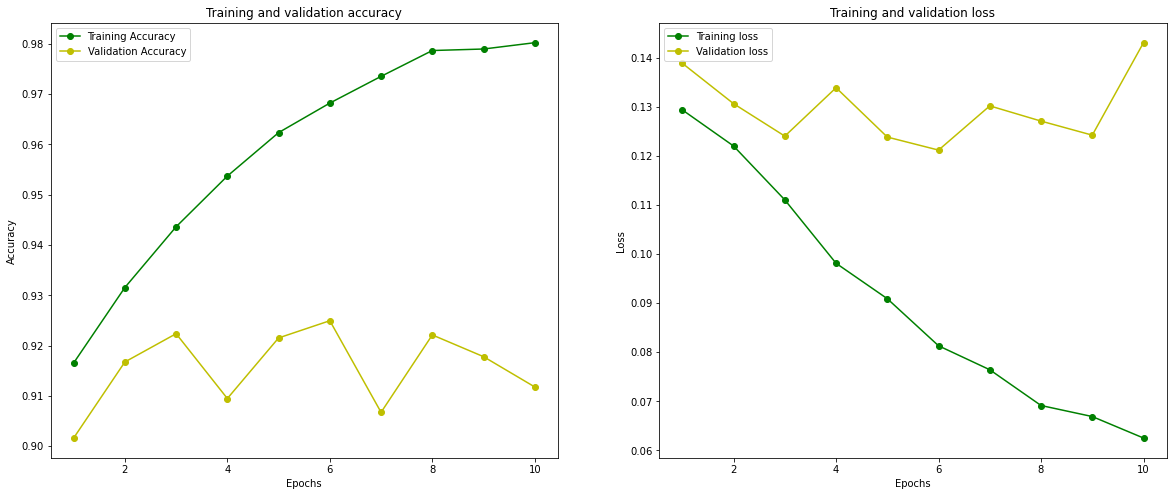

In [87]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

acc = history.history['auc']
val_acc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

ax[0].plot(epochs, acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'yo-', label='Validation Accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'go-', label='Training loss')
ax[1].plot(epochs, val_loss, 'yo-', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

In [88]:
xception_preds = model.predict(validating_gen, verbose = 1)

225/225 [==============================] - 188s 835ms/step


In [89]:
xception_y_preds = []
for i in range(len(xception_preds)):
    xception_y_preds.append(0)
    for value in xception_preds[i]: 
        if value > 0.5: 
            xception_y_preds[i] = 1
            break
            
        
len(xception_y_preds)

7182

In [90]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, xception_y_preds)


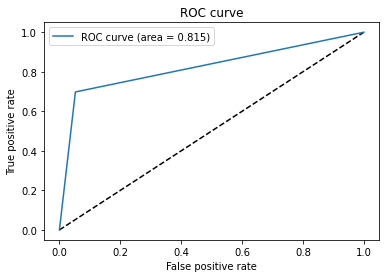

In [91]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC curve (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, xception_y_preds))
cm = confusion_matrix(y_true, xception_y_preds)

[[5807  322]
 [ 318  735]]


In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [94]:
import itertools   
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2) 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

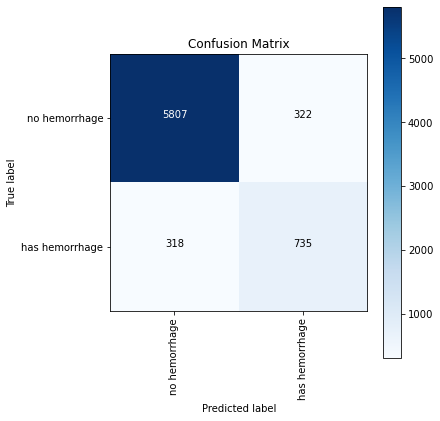

In [95]:
plot_confusion_matrix(cm, classes= ['no hemorrhage', 'has hemorrhage'], title='Confusion Matrix', normalize = False)

In [96]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [97]:
print('Model: Xception', '\n', classification_report(y_true, xception_y_preds, target_names = ['No Hemorrhage', 'Has Hemmorrhage']))

Model: Xception 
                  precision    recall  f1-score   support

  No Hemorrhage       0.95      0.95      0.95      6129
Has Hemmorrhage       0.70      0.70      0.70      1053

       accuracy                           0.91      7182
      macro avg       0.82      0.82      0.82      7182
   weighted avg       0.91      0.91      0.91      7182



In [98]:
predictions_list = []
for pred in xception_preds: 
    predictions_list.append(pred)

len(predictions_list)

7182

In [99]:
validation_frame = validate_dataf.drop(['filename'], axis=1)
validation_frame

type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
8194,0,0,0,0,0,0
21244,0,0,0,0,0,0
13085,0,0,0,0,0,0
17599,0,0,0,0,0,0
33734,0,0,0,0,0,0
...,...,...,...,...,...,...
19099,1,0,0,0,0,1
15845,0,0,0,0,0,0
27487,0,0,0,0,0,0
16193,0,0,0,0,0,0


In [100]:
if len(predictions_list) == len(validation_frame): 
    validation_frame.iloc[:,:] = predictions_list
else: 
    print("fix this issue")

In [101]:
validation_frame.insert(0, "filename", validate_dataf.filename)
validation_frame.insert(7, "true_any" ,validate_dataf.iloc[:,1])
validation_frame.insert(8, "true_epidural", validate_dataf.epidural)
validation_frame.insert(9, "true_intraparenchymal", validate_dataf.intraparenchymal)
validation_frame.insert(10, "true_intraventricular", validate_dataf.intraventricular)
validation_frame.insert(11, "true_subarachnoid", validate_dataf.subarachnoid)
validation_frame.insert(12, "true_subdural", validate_dataf.subdural)

In [102]:
validation_frame

type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,true_any,true_epidural,true_intraparenchymal,true_intraventricular,true_subarachnoid,true_subdural
8194,ID_2642b53a0.png,0.023387,0.000299,0.000882,0.000087,0.030116,0.012309,0,0,0,0,0,0
21244,ID_5a31cda45.png,0.000852,0.000177,0.000325,0.000126,0.000793,0.000749,0,0,0,0,0,0
13085,ID_39f58df73.png,0.069010,0.001955,0.006685,0.007191,0.039168,0.013374,0,0,0,0,0,0
17599,ID_4be83ba65.png,0.000948,0.000059,0.000133,0.000016,0.000873,0.000757,0,0,0,0,0,0
33734,ID_8ba70b06f.png,0.031353,0.003521,0.008944,0.002708,0.017202,0.009061,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,ID_51d94f772.png,0.479799,0.008989,0.037355,0.002918,0.342271,0.082695,1,0,0,0,0,1
15845,ID_45113f0a7.png,0.000991,0.000135,0.000372,0.000133,0.000590,0.000468,0,0,0,0,0,0
27487,ID_727534bde.png,0.810224,0.002253,0.009799,0.187662,0.524925,0.008538,0,0,0,0,0,0
16193,ID_467d80462.png,0.039182,0.001312,0.003004,0.001301,0.019924,0.023282,0,0,0,0,0,0


In [103]:
for i in range(100): 
    if validation_frame.iloc[i,1] > 0.8: 
        print("ID is : " + str(validation_frame.iloc[i,0]))
        for j in range(1,7): 
            print("predicition = " +  str(validation_frame.iloc[i,j]) )
        for k in range(7,13): 
            print("true predicition = " +  str(validation_frame.iloc[i,k]))

ID is : ID_6a99f2bc1.png
predicition = 0.8808117508888245
predicition = 0.027750790119171143
predicition = 0.05472099781036377
predicition = 0.015895038843154907
predicition = 0.3242831528186798
predicition = 0.7960233092308044
true predicition = 1
true predicition = 0
true predicition = 1
true predicition = 0
true predicition = 0
true predicition = 0
ID is : ID_19065c484.png
predicition = 0.9934269189834595
predicition = 0.012875765562057495
predicition = 0.8954495191574097
predicition = 0.020755022764205933
predicition = 0.75892174243927
predicition = 0.14887449145317078
true predicition = 1
true predicition = 0
true predicition = 1
true predicition = 1
true predicition = 1
true predicition = 0
ID is : ID_5f9d523bd.png
predicition = 0.9961839914321899
predicition = 0.0015180706977844238
predicition = 0.42359495162963867
predicition = 0.9341199398040771
predicition = 0.07692849636077881
predicition = 0.003657788038253784
true predicition = 1
true predicition = 0
true predicition = 0
t

In [104]:
any_preds = validation_frame['any']
max_index = any_preds.idxmax()
max_index

24459

In [105]:
def img_to_heatmap(): 
    highest_predicted_img = validation_frame.loc[max_index,'filename']
    if validation_frame.loc[max_index, 'true_any'] == 1:
        return highest_predicted_img

In [106]:
test_preds = model.predict_generator(testing_gen, verbose = 1)

Instructions for updating:
Please use Model.predict, which supports generators.
154/154 [==============================] - 139s 903ms/step


In [107]:
predictions_list_test = []
for pred in test_preds: 
    predictions_list_test.append(pred)

In [108]:
##### Same as Train dropping the filename dropping the filename
 
test_frame =  sample_test.drop(['filename'], axis=1)
test_frame

type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
6,0.5,0.5,0.5,0.5,0.5,0.5
96,0.5,0.5,0.5,0.5,0.5,0.5
98,0.5,0.5,0.5,0.5,0.5,0.5
113,0.5,0.5,0.5,0.5,0.5,0.5
123,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...
119933,0.5,0.5,0.5,0.5,0.5,0.5
120013,0.5,0.5,0.5,0.5,0.5,0.5
120022,0.5,0.5,0.5,0.5,0.5,0.5
120028,0.5,0.5,0.5,0.5,0.5,0.5


In [109]:
test_frame.iloc[:,:] = predictions_list_test
test_frame

type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
6,0.005036,0.000162,0.003007,0.002073,0.002166,0.000660
96,0.016682,0.001240,0.002015,0.001396,0.012780,0.014402
98,0.009731,0.001386,0.001464,0.000274,0.005656,0.006640
113,0.000162,0.000098,0.000116,0.000165,0.000129,0.000147
123,0.017371,0.000622,0.004413,0.000350,0.004314,0.006905
...,...,...,...,...,...,...
119933,0.000435,0.000109,0.000685,0.000425,0.000487,0.000326
120013,0.003224,0.000403,0.000766,0.000343,0.003076,0.001917
120022,0.004332,0.001540,0.003412,0.001180,0.002965,0.001773
120028,0.003043,0.000490,0.001569,0.000883,0.002825,0.001619


In [110]:
test_frame.insert(0, "filename", test_df.filename)
test_frame

type,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
6,ID_0001f6d2a.png,0.005036,0.000162,0.003007,0.002073,0.002166,0.000660
96,ID_0030cd32d.png,0.016682,0.001240,0.002015,0.001396,0.012780,0.014402
98,ID_0031abb30.png,0.009731,0.001386,0.001464,0.000274,0.005656,0.006640
113,ID_0038cd140.png,0.000162,0.000098,0.000116,0.000165,0.000129,0.000147
123,ID_003fd61d5.png,0.017371,0.000622,0.004413,0.000350,0.004314,0.006905
...,...,...,...,...,...,...,...
119933,ID_fd519bf7d.png,0.000435,0.000109,0.000685,0.000425,0.000487,0.000326
120013,ID_fd7211e2a.png,0.003224,0.000403,0.000766,0.000343,0.003076,0.001917
120022,ID_fd765af5e.png,0.004332,0.001540,0.003412,0.001180,0.002965,0.001773
120028,ID_fd78ffe65.png,0.003043,0.000490,0.001569,0.000883,0.002825,0.001619


ID_0030cd32d.png has a probability: 0.016682118 for a 'any' type of hemorrhage


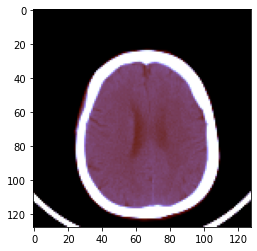

ID_0030cd32d.png has a probability: 0.012779683 for a 'subarachnoid' type of hemorrhage


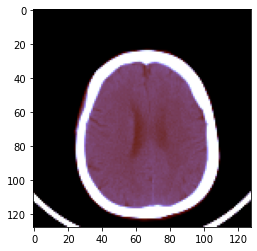

ID_0030cd32d.png has a probability: 0.0144016445 for a 'subdural' type of hemorrhage


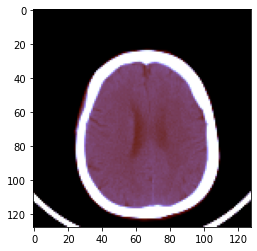

ID_003fd61d5.png has a probability: 0.01737079 for a 'any' type of hemorrhage


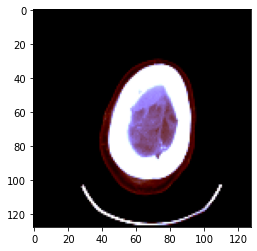

ID_005381fc2.png has a probability: 0.05140829 for a 'any' type of hemorrhage


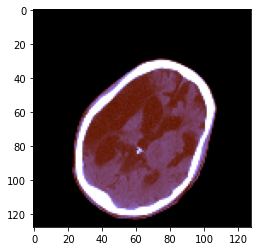

ID_005381fc2.png has a probability: 0.026969701 for a 'subarachnoid' type of hemorrhage


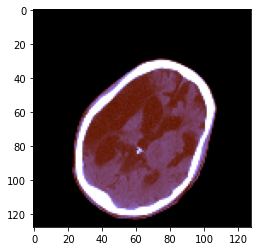

ID_005381fc2.png has a probability: 0.026579022 for a 'subdural' type of hemorrhage


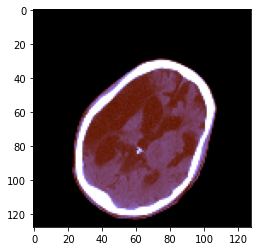

ID_008854f35.png has a probability: 0.095407516 for a 'any' type of hemorrhage


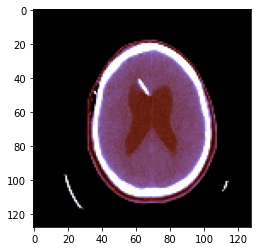

ID_008854f35.png has a probability: 0.06266001 for a 'intraventricular' type of hemorrhage


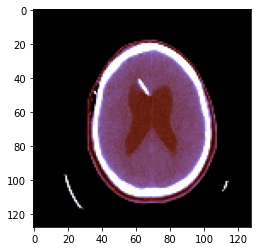

ID_008854f35.png has a probability: 0.026922971 for a 'subarachnoid' type of hemorrhage


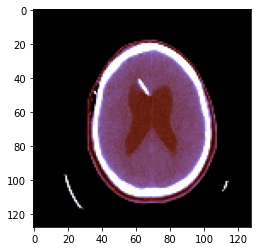

ID_0112de899.png has a probability: 0.027566046 for a 'any' type of hemorrhage


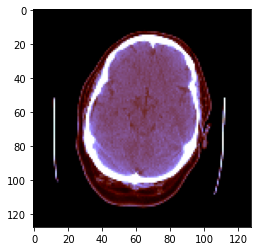

ID_0112de899.png has a probability: 0.023144454 for a 'subarachnoid' type of hemorrhage


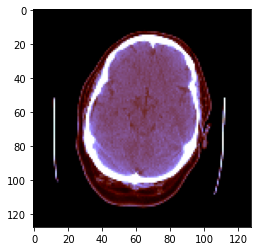

ID_0112de899.png has a probability: 0.012955397 for a 'subdural' type of hemorrhage


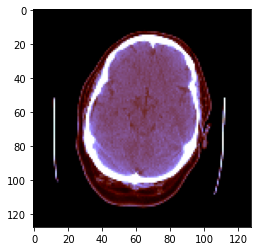

In [114]:
from PIL import Image
for i in range(20): 
  
    for j in range(1,7): 
        if test_frame.iloc[i,j] > 0.01: 
            path = "C:/Users/yufen/Desktop/Resize_PNG_Data/" + str(test_frame.iloc[i,0])
            img = Image.open(path)
            plt.imshow(img)
            print(str(test_frame.iloc[i,0]) + " has a probability: "  + str(test_frame.iloc[i,j]) + " for a '" + str(test_frame.columns[j]) + "' type of hemorrhage")
            plt.show()